In [1]:
import os
import csv
import sys
module_path = os.path.abspath(os.path.join('C:\\Users\\koolk\\Desktop\\brain-diffusion\\Chad_functions_and_unittests'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

In [4]:
import numpy as np
from MSD_utils import get_data_pups, build_time_array, return_average, avg_all, graph_single_variable
from MSD_utils import SD_all, return_SD, range_and_ticks, choose_y_axis_params, data_prep_for_plotting_pups
from MSD_utils import fill_in_and_split, plot_traj_length_histogram, plot_traj, filter_out_short_traj
from MSD_utils import plot_trajectory_overlay, quality_control

from MSD_utils import diffusion_coefficient_point_derivative, diffusion_coefficient_linear_regression
from MSD_utils import calculate_diffusion_coefficients, diffusion_bar_chart, summary_barcharts

In [5]:
path = "./{genotype}/geoM2xy_{sample_name}.csv"
frames = 90
SD_frames = [1, 7, 14, 15]
conversion = (0.3, 3.95, 1)#(0.5, 1.93, 1)
to_frame = 16
dimension = "2D"
time_to_calculate = 1

parameters = {}
parameters["channels"] = ["RED", "YG"]
parameters["genotypes"] = ["KO"]
parameters["pups"] = ["P1", "P2", "P3"]
parameters["surface functionalities"] = ["PEG"]
parameters["slices"] = ["S1", "S2", "S3"]
parameters["regions"] = ["cortex", "mid"]
parameters["replicates"] = [1, 2, 3, 4, 5]

base_name = "KO"

cut = 4
path2 = "./{genotype}/{pup}/{region}/{channel}/Traj_{sample_name}.tif.csv"
folder = "./{genotype}/{pup}/{region}/{channel}/"

# MSD Plots

In [6]:
data, avg_over_slices, avg_over_pups, names_with_replicates, time, time_SD, average_over_slices, average_over_pups,\
    all_SD_over_slices, all_SD_over_pups = data_prep_for_plotting_pups(path, frames, SD_frames, conversion, to_frame, parameters)

In [7]:
y_range, ticks_y, dec_y, x_range, ticks_x, dec_x = 20, 2.5, 1, 5, 1, 1

In [ ]:
# #Put dataset with largest y range here.

# in_name1 = "YG"
# in_name2 = "YG"

# y_range, ticks_y, dec_y, x_range, ticks_x, dec_x = graph_single_variable(average_over_pups, all_SD_over_pups, time, time_SD, SD_frames, in_name1, in_name2, to_frame=to_frame,
#                       modify_labels=True, label_identifier="PEG_", base_name=base_name)
# plt.show()

In [8]:
in_name1 = "RED"
in_name2 = "RED"

graph_single_variable(average_over_pups, all_SD_over_pups, time, time_SD, SD_frames, in_name1, in_name2, to_frame=to_frame, y_range=y_range,
                      ticks_y=ticks_y, dec_y=dec_y, x_range=x_range, ticks_x=ticks_x, dec_x=dec_x,
                      modify_labels=True, label_identifier="PEG_", x_manual=True, base_name=base_name)
plt.show()

In [10]:
in_name1 = ["cortex", "mid"]
in_name2 = ["RED", "YG"]

for one in in_name1:
    for two in in_name2:

        graph_single_variable(average_over_slices, all_SD_over_slices, time, time_SD, SD_frames, one, two, to_frame=to_frame, y_range=y_range,
                              ticks_y=ticks_y, dec_y=dec_y, x_range=x_range, ticks_x=ticks_x, dec_x=dec_x,
                              modify_labels=True, label_identifier="PEG_", x_manual=True, base_name=base_name)
plt.show()

# Trajectory Plots and Histograms

In [ ]:
quality_control(path2, folder, frames, conversion, parameters, cut)

# Diffusion Coefficient Bar Charts

In [12]:
p_derivative, lin_fit = calculate_diffusion_coefficients(parameters["channels"], parameters["genotypes"], parameters["pups"],parameters["surface functionalities"], parameters["slices"],
                                 parameters["regions"], parameters["replicates"], path, time, time_to_calculate, to_frame, dimension)

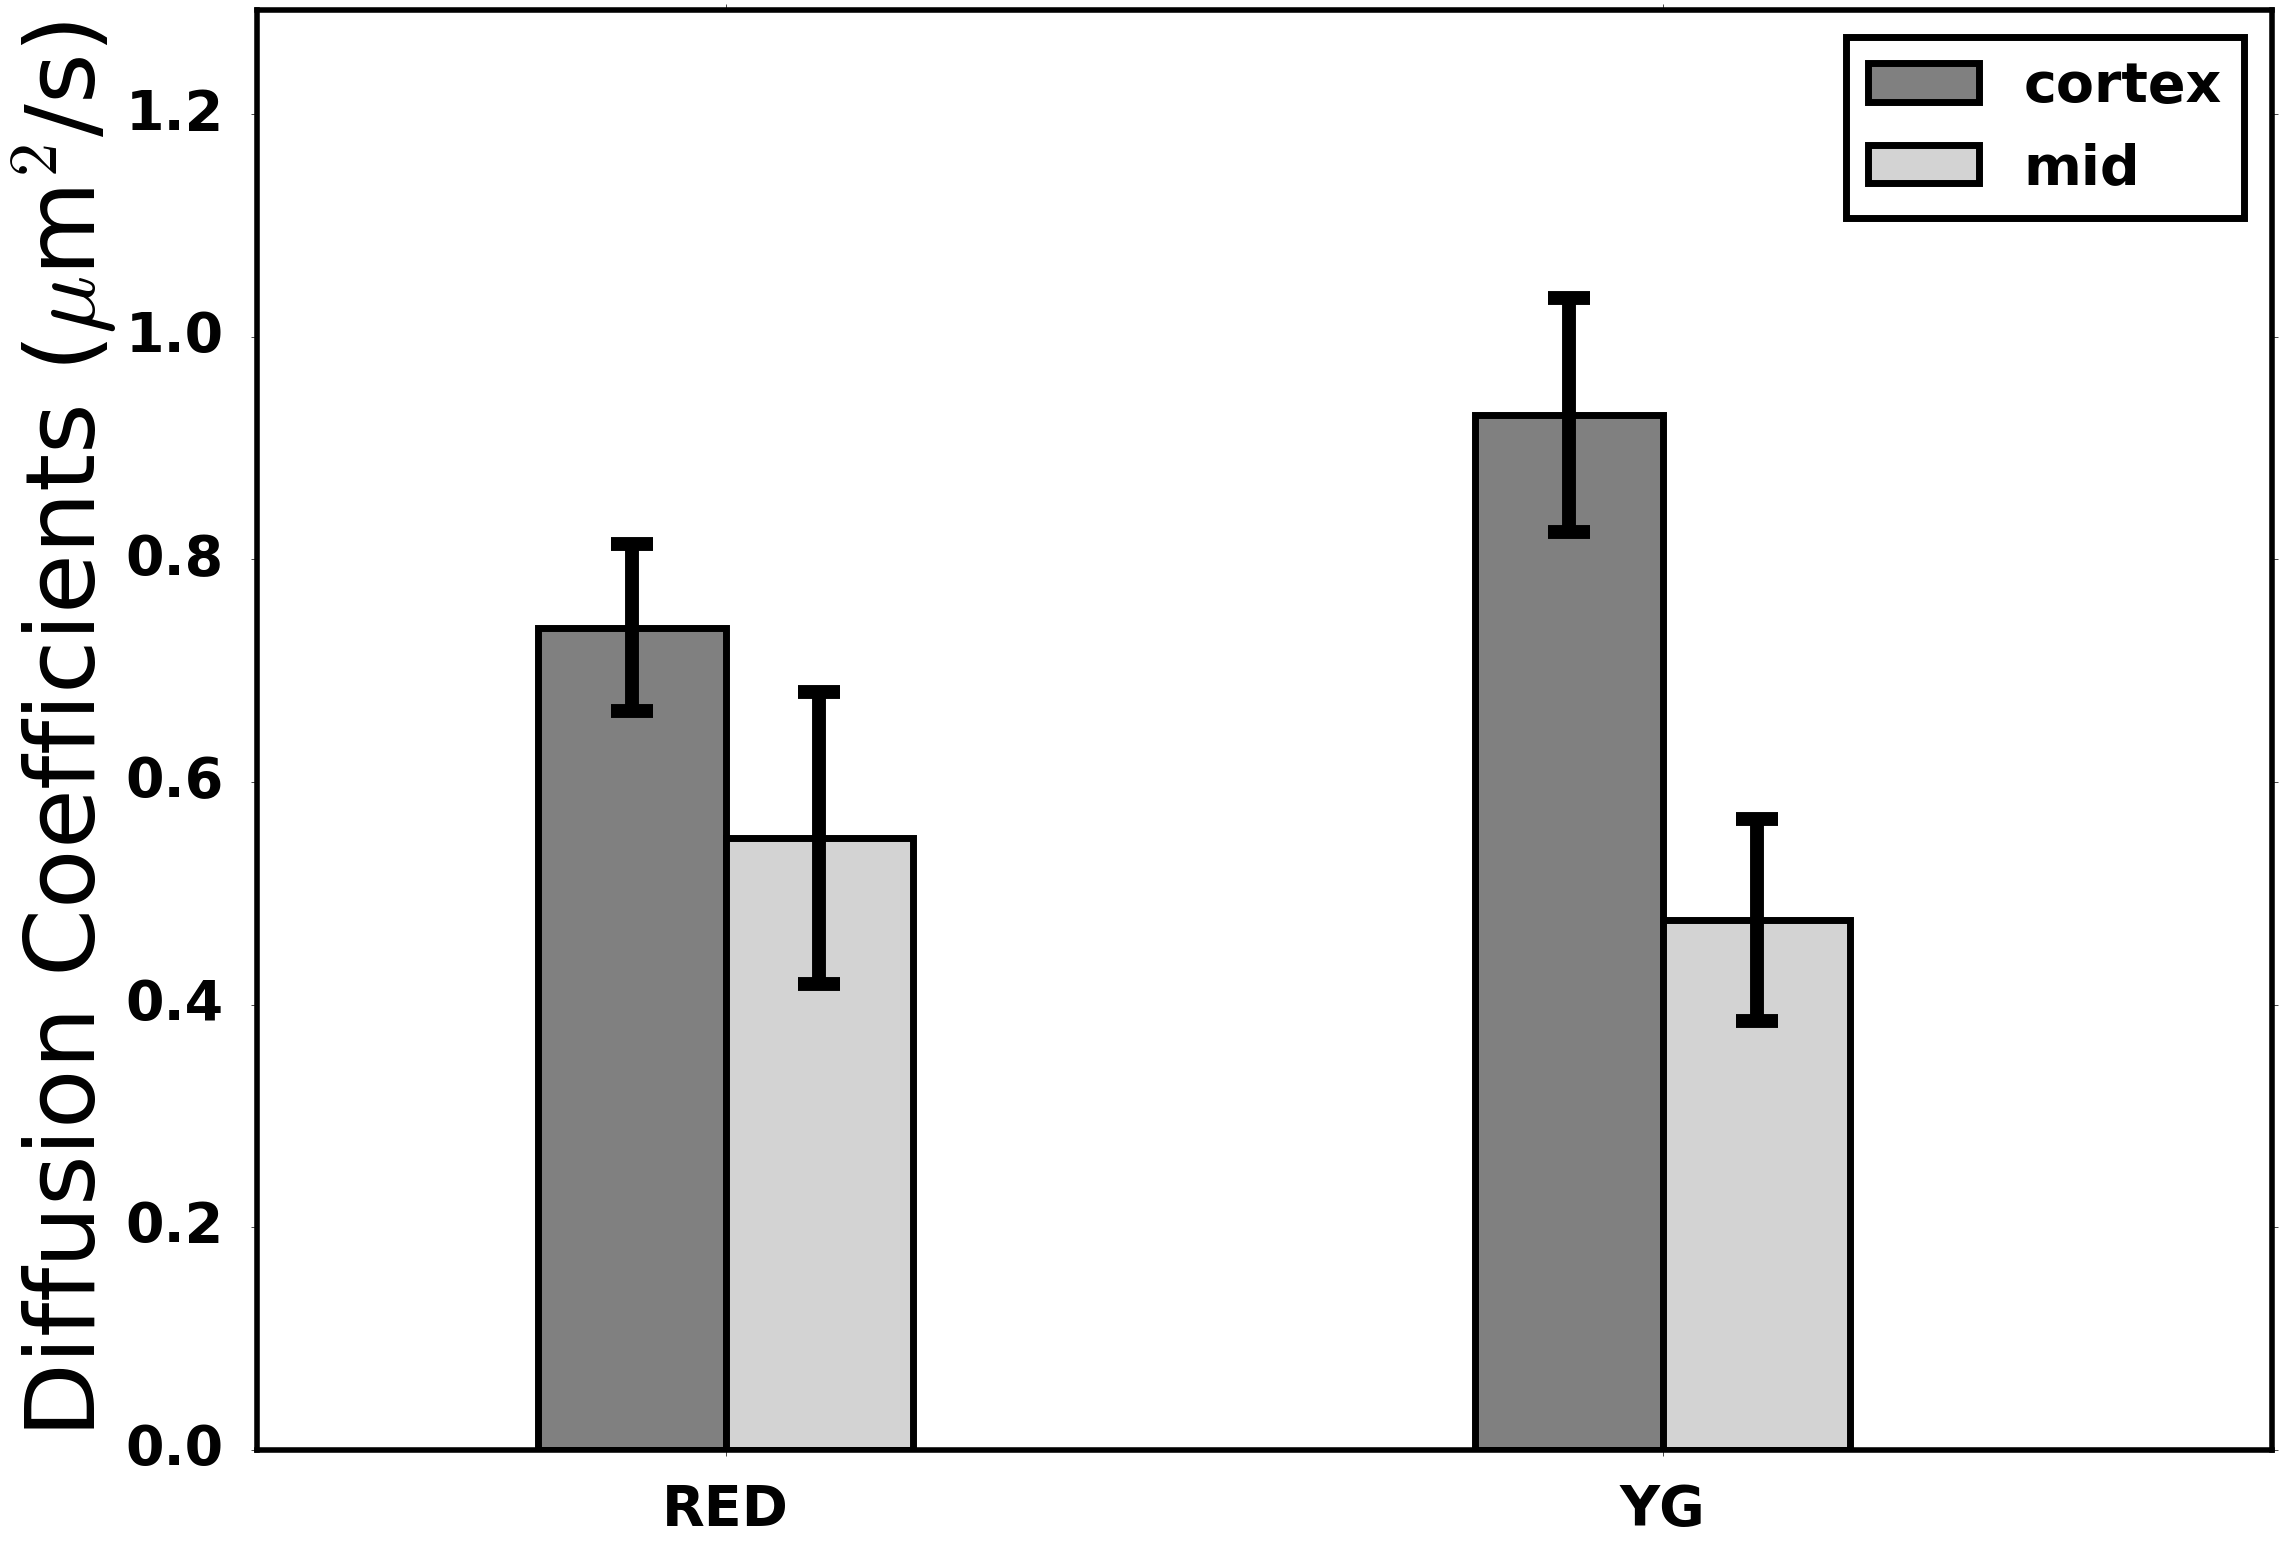

In [14]:
summary_barcharts(p_derivative, parameters)

from IPython.display import Image
Image(filename='diffusion_barchart.png') 